In [1]:
import torch

### Scalar


https://www.geeksforgeeks.org/machine-learning/difference-between-scalar-vector-matrix-and-tensor/

In [2]:
x= torch.tensor(3.0)
y = torch.tensor(2.0)

x + y, x * y, x / y, x**y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

### Vector


In [3]:
x = torch.arange(3)

x

tensor([0, 1, 2])

In [4]:
# Recall that we access a tensor’s elements via indexing

x[2]

tensor(2)

In [5]:
len(x)

3

In [6]:
# shape is a tuple that indicates a tensor’s length along each axis. 
# Tensors with just one axis have shapes with just one element
x.shape

torch.Size([3])

### Matrices

In [7]:
A = torch.arange(6).reshape(3, 2)
A

tensor([[0, 1],
        [2, 3],
        [4, 5]])

In [8]:
# Sometimes we want to flip the axes
# Transpose = swap rows and columns
A.T

tensor([[0, 2, 4],
        [1, 3, 5]])

In [9]:
# A== A.T it doest matches the 

In [10]:
A = torch.tensor([[1, 2, 3], [2, 0, 4], [3, 4, 5]])
A == A.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

In [11]:
print(A)
print(A.T)

tensor([[1, 2, 3],
        [2, 0, 4],
        [3, 4, 5]])
tensor([[1, 2, 3],
        [2, 0, 4],
        [3, 4, 5]])


### Tensors

In [12]:
torch.arange(24).reshape(2, 3, 4)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

### Basic Properties of Tensor Arithmetic

In [13]:
A = torch.arange(6, dtype=torch.float32).reshape(2, 3)
B = A.clone()  # Assign a copy of A to B by allocating new memory
A, A + B

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor([[ 0.,  2.,  4.],
         [ 6.,  8., 10.]]))

In [14]:
A*B

# Adding or multiplying a scalar and a tensor produces a result 
# with the same shape as the original tensor.

tensor([[ 0.,  1.,  4.],
        [ 9., 16., 25.]])

In [17]:
a = 2 
X = torch.arange(24).reshape(2,3,4)
print(X)
a+X,(a * X).shape

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])


(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 torch.Size([2, 3, 4]))

### Reduction

In [18]:
x = torch.arange(3, dtype=torch.float32)
x, x.sum()

(tensor([0., 1., 2.]), tensor(3.))

In [21]:
A,A.shape, A.sum()

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 torch.Size([2, 3]),
 tensor(15.))

In [46]:
A.shape, A.sum(dim=0).shape

(torch.Size([2, 3]), torch.Size([3]))

In [45]:
A.sum(dim=[0, 1]) == A.sum()  # Same as A.sum()

tensor(True)

In [28]:
# calculating mean

A.mean(), A.sum()/A.numel()

(tensor(2.5000), tensor(2.5000))

In [43]:
#  the function for calculating the mean can also reduce a tensor along specific axes.

A.mean(dim=0), A.sum(dim=0) / A.shape[0]

(tensor([1.5000, 2.5000, 3.5000]), tensor([1.5000, 2.5000, 3.5000]))

### Non-Reduction Sum

In [44]:
# This matters when we want to use the broadcast mechanism.
sum_A = A.sum(dim=1, keepdim=True)
A,sum_A, sum_A.shape

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor([[ 3.],
         [12.]]),
 torch.Size([2, 1]))

In [35]:
A / sum_A

tensor([[0.0000, 0.3333, 0.6667],
        [0.2500, 0.3333, 0.4167]])

In [ ]:
# alculate the cumulative sum of elements
A.cumsum(dim=0)

tensor([[0., 1., 2.],
        [3., 5., 7.]])

### Dot Product

In [ ]:
# One of the most fundamental operations is the dot product
y = torch.ones(3, dtype = torch.float32)
x, y, torch.dot(x, y),

(tensor([0., 1., 2.]), tensor([1., 1., 1.]), tensor(3.), tensor(3.))

In [48]:
# Equivalently, we can calculate the dot product of two vectors by performing an elementwise multiplication 

torch.sum(x * y)

tensor(3.)

### Matrix–Vector Products

In [ ]:
A.shape,x.shape,torch.mv(A,x), A@x

# @ is a dot product operation symbol
# .mv is matrix vector product

(torch.Size([2, 3]), torch.Size([3]), tensor([ 5., 14.]), tensor([ 5., 14.]))

### Matrix–Matrix Multiplication

In [53]:
B = torch.ones(3, 4)
torch.mm(A, B), A@B

# .mm is matrix multipication still work with @ operator

(tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]),
 tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]))

### Norms

L2 norms


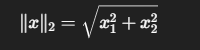

uses this formula 

In [ ]:
# Norm is for calculating vector length
# Norm must be non-negative (think length cannot be zero)
# But vector can be negative norm o/p will be positive 
# When a vector increases in size, its norm increases as well.

# torch.norm uses L2 norm method 
u = torch.tensor([3.0, -4.0])
torch.norm(u)

​

tensor(5.)

L1 norms


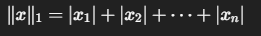

uses this formula

In [ ]:
# it gives absolute value 
# Think of walking distance on a grid

# You can only move left/right/up/down
# Distance = total steps taken

# torch.abs uses l1 norm method

torch.abs(u).sum()

tensor(7.)

In [81]:
# For a matrix, torch.norm(x) computes the Frobenius norm
# (which is the matrix version of the L2 norm).

torch.norm(torch.ones((4, 9)))

tensor(6.)

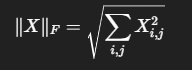

frobenius norm

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1.]])